# An analysis of 3 regions for oil aquisitions and investment

**Introduction**

Oily Giant is attempting to analyze 3 regions for their next $100,000,000 investment. They are hoping to drill 200 new wells in one of the 3 regions and are looking to find the investment that offers the highest profit margin with a risk of loss of less that 2.5%.

In this analysis I will import the data from the three regions and prepare it for processing by exploring their contents. Then I will use a linear regression machine learning to make the best predictions of oil in reserve in each of the 100,000 locations in each region. After developing the model with its predictions, I will use those to analyze the profitability of drilling in each region. Finally, I will use the bootstrapping technique to provide a 95% confidence interval for the profitability of the investments.


In [1]:
#Import resources needed for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

**Part 1:**

Download and prepare the data. Explain the procedure.

In [3]:
#create 3 dataframes for the three datasets
region0 = pd.read_csv('geo_data_0.csv')
region1 = pd.read_csv('geo_data_1.csv')
region2 = pd.read_csv('geo_data_2.csv')

In [4]:
#show the first five rows of the dataframe and call its shape
display(region0.head())
print(region0.shape)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


(100000, 5)


In [ ]:
#Call info on the dataframe to check data types and null values
region0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
#show the first five rows of the dataframe and call its shape
display(region1.head())
print(region1.shape)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


(100000, 5)


In [ ]:
#Call info on the dataframe to check data types and null values
region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
#show the first five rows of the dataframe and call its shape
display(region2.head())
print(region2.shape)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


(100000, 5)


In [ ]:
#Call info on the dataframe to check data types and null values
region2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
#check for duplicates.
print('there are',region0.duplicated().sum(), 'duplicated rows in df0.')
print('there are',region1.duplicated().sum(), 'duplicated rows in df1.')
print('there are',region2.duplicated().sum(), 'duplicated rows in df2.')

there are 0 duplicated rows in df0.
there are 0 duplicated rows in df1.
there are 0 duplicated rows in df2.


In [ ]:
#are all the id's unique?
print(region0['id'].nunique())
print(region1['id'].nunique())
print(region2['id'].nunique())

99990
99996
99996


In [ ]:
#How many unique values are there in the product column?
print('Region 0 has', region0['product'].nunique(), 'unique values in the product column')
print('Region 1 has', region1['product'].nunique(), 'unique values in the product column')
print('Region 2 has', region2['product'].nunique(), 'unique values in the product column')

Region 0 has 100000 unique values in the product column
Region 1 has 12 unique values in the product column
Region 2 has 100000 unique values in the product column


In [ ]:
#remove superfluous columns - in this case the id column does not help with building the predictive model.
region0 = region0.drop(['id'], axis=1)
region1 = region1.drop(['id'], axis=1)
region2 = region2.drop(['id'], axis=1)

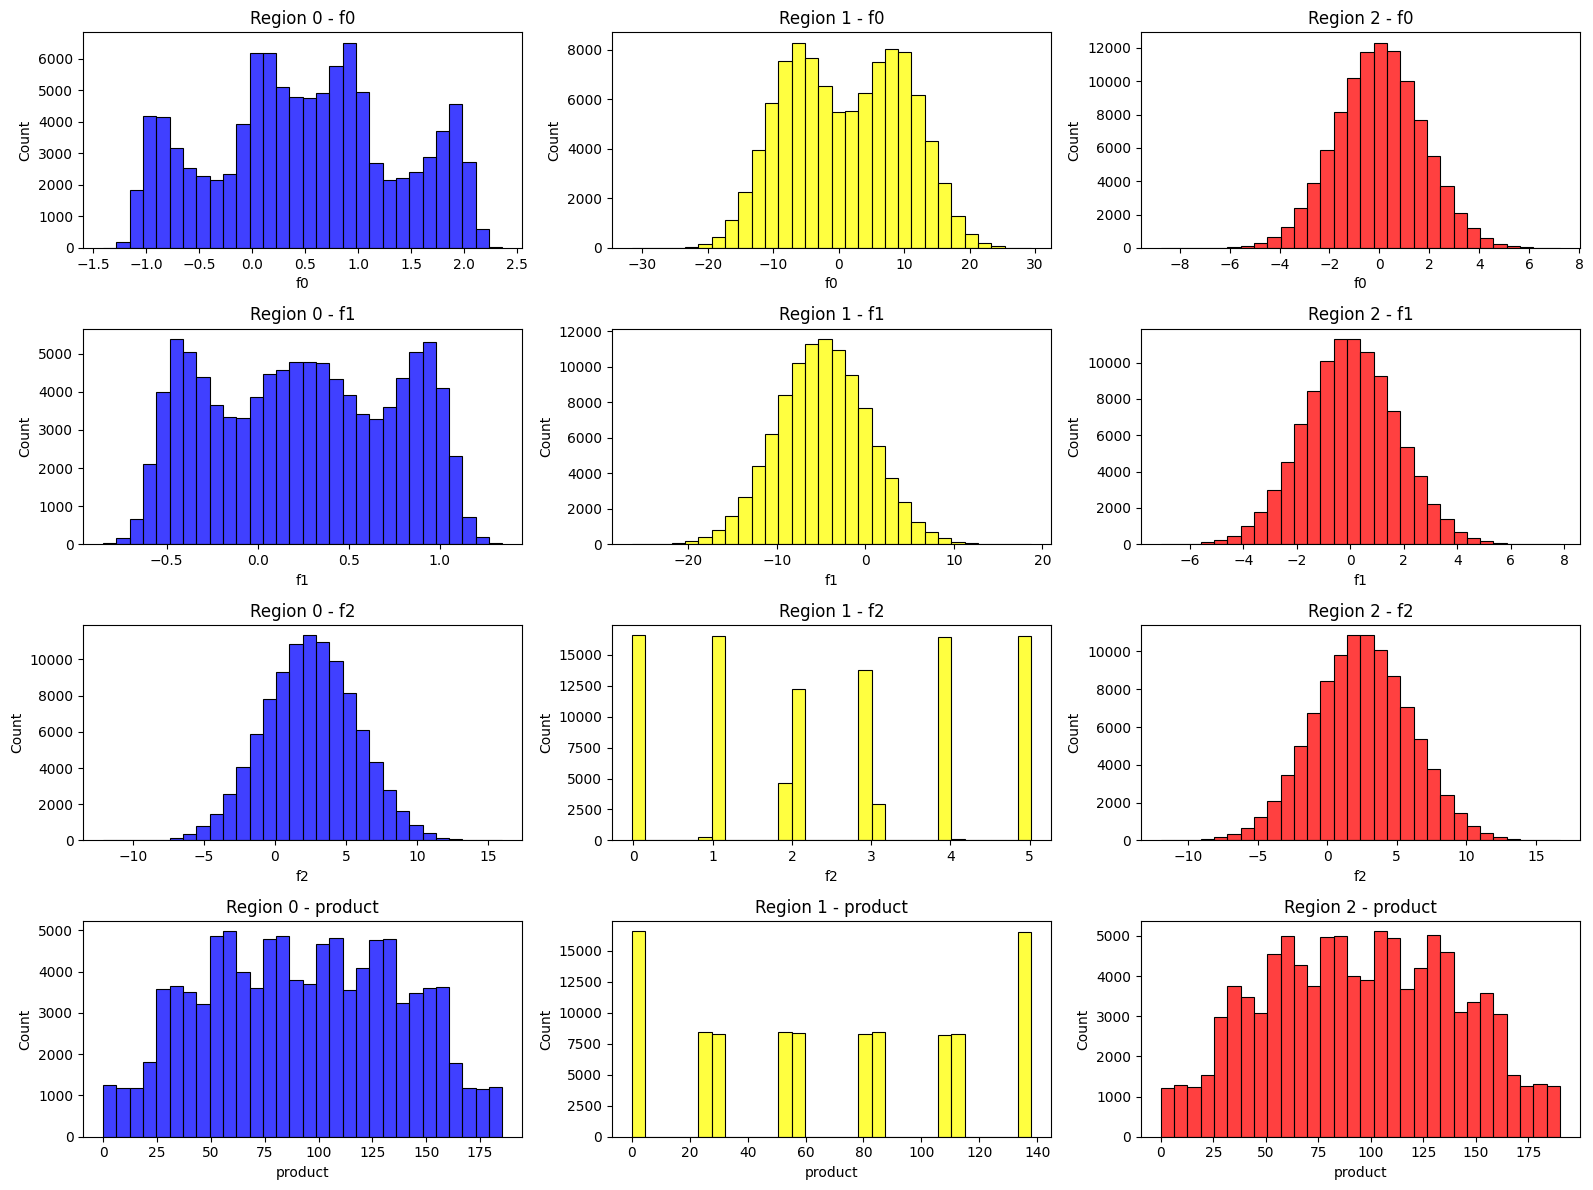

In [ ]:
# Show the different features and target compared using histograms
## List of datasets and their labels
datasets = {'Region 0': region0, 'Region 1': region1, 'Region 2': region2}
columns_to_plot = ['f0', 'f1', 'f2', 'product']

# Set the figure size
plt.figure(figsize=(16, 12))

# Add colors
colors = {'Region 0': 'blue', 'Region 1': 'yellow', 'Region 2': 'red'}

# Loop through each column and region
for row, column in enumerate(columns_to_plot, 1):
    for col, (label, data) in enumerate(datasets.items(), 1):
        plt.subplot(len(columns_to_plot), len(datasets), (row - 1) * len(datasets) + col)
        sns.histplot(data[column], bins=30, color=colors[label], edgecolor='black')
        plt.title(f"{label} - {column}")
        plt.xlabel(column)
        plt.ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

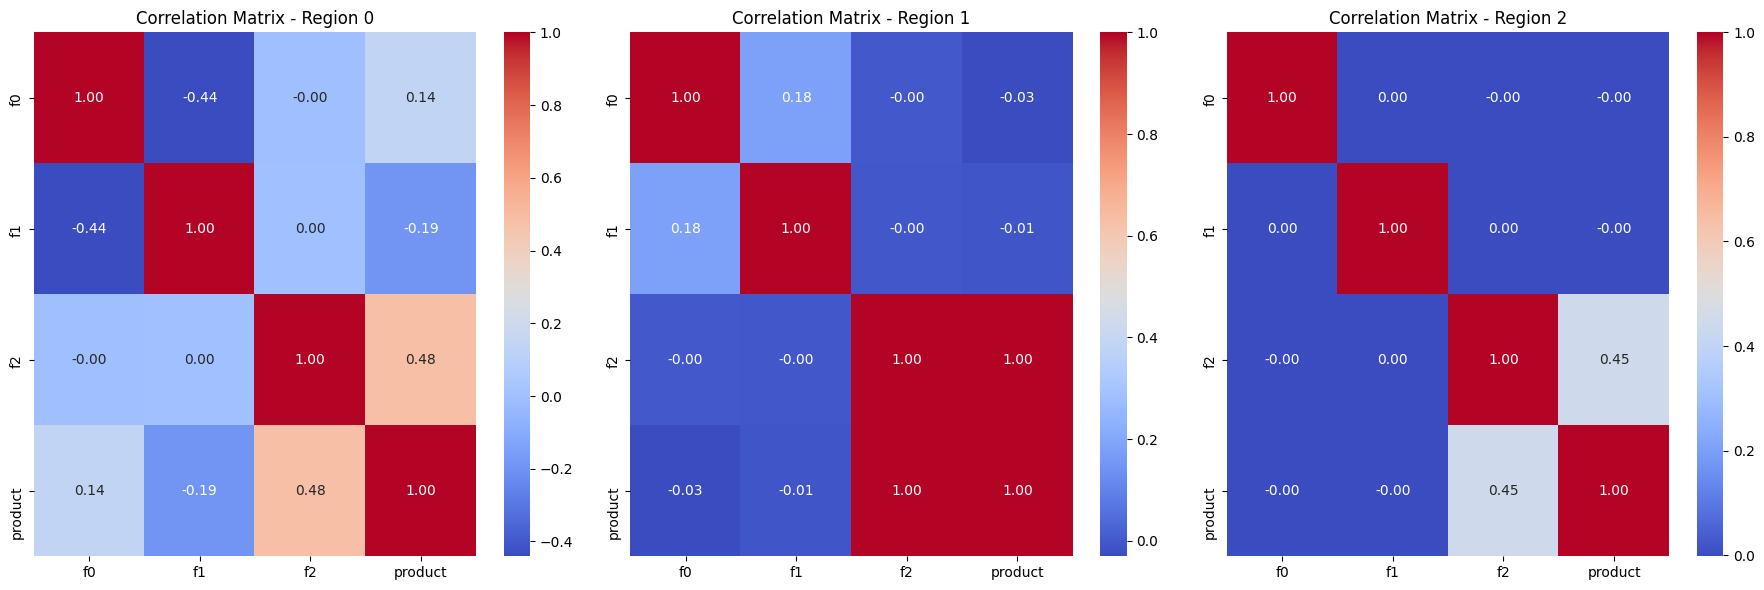

In [ ]:
# Conduct Correlational Analysis using Heatmaps
## Set up the figure for subplots
plt.figure(figsize=(18, 6))

# Loop through each dataset to calculate and plot the heatmap
for i, (label, data) in enumerate(datasets.items(), 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns for side-by-side comparison
    correlation_matrix = data[['f0', 'f1', 'f2', 'product']].corr()  # Calculate correlation
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix - {label}")

# Adjust layout
plt.tight_layout()
plt.show()

There are 18 repeat regions, but there are also no duplicated rows which suggests that those ids have multiple wells. So dropping them would not be an advantageous action.

Region 1 has an interesting issue with the Product column. There are only 12 unique values. That means, for the 100,000 rows, there are only 12 different values that are simply repeated over and over throughout the data set. Any predictive effort is going to easily find a trend and be able to draw a clean line to predict the values.

Preprocessing: All three dataframes contain 100,000 observations with 5 columns. There are no missing values in any of the dataframes. None of the rows are duplicated.
In the project description, each of the columns (f0,f1,f2) are significant for the outcomes of this work. The Product column is referencing the volume of oil in thousands of barrels that the wells have in reserve.
Since the id column is not going to help with building the linear regression model, I will drop that feature.


**Part 2:**

Train and test the model for each region:

 2.1. Split the data into a training set and validation set at a ratio of 75:25.

 2.2. Train the model and make predictions for the validation set.

 2.3. Save the predictions and correct answers for the validation set.

 2.4. Print the average volume of predicted reserves and model RMSE.

 2.5. Analyze the results.

In [ ]:
#split the 3 regions into training and test sets. Use a function to decrease repetative work.
def train_and_test_model(data):
    # Define target and features for the data
    target = data['product']
    features = data.drop(['product'], axis=1)
    
    # Split the data into training and validation sets
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=8420)
    
    # Scale features
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    # Make predictions and save it to a variable
    predictions = model.predict(features_valid)
    
    # Save predictions and correct answers into a new dataframe
    df = pd.DataFrame({'predictions': predictions, 'correct': target_valid})
    
    # Average volume of reserves, predicted
    avg_predicted = df['predictions'].mean()
    avg_actual = df['correct'].mean()
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(df['correct'], df['predictions'])
    rmse = mse**0.5
    
    # Print results
    print(f'Average volume of actual reserves: {avg_actual:.3f}')
    print(f'Average volume of predicted reserves: {avg_predicted:.3f}')
    print(f'RMSE: {rmse:.3f}')
    
    return df


In [ ]:
#Apply Function to each region
print('Region0:')
region0_LR = train_and_test_model(region0)
print()
print('Region1:')
region1_LR = train_and_test_model(region1)
print()
print('Region2:')
region2_LR = train_and_test_model(region2)

Region0:
Average volume of actual reserves: 92.271
Average volume of predicted reserves: 92.806
RMSE: 37.616

Region1:
Average volume of actual reserves: 69.314
Average volume of predicted reserves: 69.310
RMSE: 0.893

Region2:
Average volume of actual reserves: 95.452
Average volume of predicted reserves: 95.026
RMSE: 40.334


In [ ]:
display(region0_LR.head())

,predictions,correct
31461,66.683833,53.781070
33619,105.431360,125.576979
50702,141.490063,143.779925
82827,71.086538,57.324852
9468,80.424262,51.806039


**Model Findings:**
At a preliminary look at the model, Region 0 and Region 2 both have significantly more oil held in reserve than Region 1. Region 1 has only 69 thousand barrels on average per well, but with such a low RMSE value the model is predicting values exceptionally close to the actual values. As previously stated this was to be expected since there are only 12 unique values in the "product" column for Region 1. The model does not predict quite as well for regions 0 and 2 with their RMSE values at 37 and 40 respectively.

**Part 3:**

Prepare for profit calculation:

 3.1. Store all key values for calculations in separate variables.

 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

 3.3. Provide the findings about the preparation for profit calculation step.

Conditions:

-When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.

-The budget for development of 200 oil wells is 100 USD million.

-One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

-After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

In [ ]:
#3.1 Store all key values for calculations in separate variables.
#create variables for profit calculations
BUDGET = 100_000_000 #USD for 200 oil wells
BARREL = 4.5 #USD per barrel
PRODUCT_VALUE = BARREL*1_000 #each unit of the product column is 1000 barrels
NUMBER_OF_WELLS = 200 #number of wells we want to develop
RISK_VALUE = .025 #percent that fit the overall goal

In [ ]:
#3.2.1 Calculate the volume of reserves sufficient for developing a new well without losses. 
#calculate the minumum amount of oil in reserve to be considered
min_oil_reserve = BUDGET/PRODUCT_VALUE/NUMBER_OF_WELLS
print(f'Minimum quantity of oil in reserve to be considered: {min_oil_reserve:.1f} thousand barrels')

Minimum quantity of oil in reserve to be considered: 111.1 thousand barrels


In [ ]:
#3.2.2 Compare the obtained value with the average volume of reserves in each region.
#Calculate the average volume in each region
def average_product(region):
    region_avg = region['product'].mean()
    return(f'average product: {region_avg:.1f}')

print('Region 0', average_product(region0))
print()
print('Region 1', average_product(region1))
print()
print('Region 2', average_product(region2))

Region 0 average product: 92.5

Region 1 average product: 68.8

Region 2 average product: 95.0


**Profit Calculation Prepartion Findings:**
Region 2 has the highest average volume of oil coming in at 95 thousand barrels, and Region 0 was close behind with 92.5 thousand. Region 1 struggled the most with only 68.8 thousand barrels. The average amount of available oil in each region is well below the 111 thousand barrel threshhold found earlier. However, since we will only be looking to drill 200 new wells, I will look at the top 200 wells in each region for further exploration.

**Part 4:**

Write a function to calculate profit from a set of selected oil wells and model predictions:

 4.1. Pick the wells with the highest values of predictions. 

 4.2. Summarize the target volume of reserves in accordance with these predictions

 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [ ]:
#Find the top 200 wells for each region
top_200_0 = region0_LR.sort_values('predictions', ascending=False).head(200)
top_200_1 = region1_LR.sort_values('predictions', ascending=False).head(200)
top_200_2 = region2_LR.sort_values('predictions', ascending=False).head(200)

#Find the average product value for each region in the top 200 lists
top_200_0_avg = top_200_0['predictions'].mean()
top_200_1_avg = top_200_1['predictions'].mean()
top_200_2_avg = top_200_2['predictions'].mean()

#print results
print(f'Region 0 top 200 wells average: {top_200_0_avg:.1f} thousand barrels in reserve')
print()
print(f'Region 1 top 200 wells average: {top_200_1_avg:.1f} thousand barrels in reserve')
print()
print(f'Region 2 top 200 wells average: {top_200_2_avg:.1f} thousand barrels in reserve')


Region 0 top 200 wells average: 155.4 thousand barrels in reserve

Region 1 top 200 wells average: 138.8 thousand barrels in reserve

Region 2 top 200 wells average: 148.5 thousand barrels in reserve


In [ ]:
#Regional ranges of product for the top 200 wells

#Region 0 
region0_min = top_200_0['predictions'].min()
region0_max = top_200_0['predictions'].max()
print(f'Region 0 range: {region0_min} - {region0_max}')

#Region 1
region1_min = top_200_1['predictions'].min()
region1_max = top_200_1['predictions'].max()
print(f'Region 1 range: {region1_min} - {region1_max}')

#Region 2
region2_min = top_200_2['predictions'].min()
region2_max = top_200_2['predictions'].max()
print(f'Region 2 range: {region2_min} - {region2_max}')

Region 0 range: 147.9868788399923 - 195.4484210674879
Region 1 range: 138.41125840728233 - 139.85251859875626
Region 2 range: 142.4017077624181 - 174.1437193720216


In [ ]:
def profit_calc(data):
    # Select top 200 wells by predicted values
    top_wells = data.sort_values('predictions', ascending=False).head(200)
    
    # Use actual target values ('product') for revenue calculation
    total_revenue = top_wells['correct'].sum() * PRODUCT_VALUE
    
    # Calculate profit
    profit = total_revenue - BUDGET
    return profit

# Use a for loop to write the print statements and call the function
for i, region in enumerate([top_200_0, top_200_1, top_200_2]):
    print(f'Region {i} profit: ${profit_calc(region):.2f}')
    print()
    
region0_profit = profit_calc(top_200_0)
region1_profit = profit_calc(top_200_1)
region2_profit = profit_calc(top_200_2)

Region 0 profit: $32279065.69

Region 1 profit: $24150866.97

Region 2 profit: $24332367.89



**Calculated Profit Findings:**
Region 0 boasts the highest profit margin of the 3 regions with a total profit of $32,279,065. Region 2 came in second place with a margin of 24,332,367. And finally, Region 1 fell short of the other two regions with a margin of 24,150,866. Any of the three regions would be a profitable venture for Oily Giant. However, they will most benefit by investing their resources in Region 0.

**Part 5:**

Calculate risks and profit for each region:

5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.

5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

In [ ]:
state = np.random.RandomState(8420)
def bootstrap(predictions, n_samples=1000, n_wells=500):
    values = []
    for _ in range(n_samples):
        # Sample 500 wells with replacement
        sample = predictions.sample(n=n_wells, replace=True, random_state=state)
        # Calculate profit based on sampled wells
        values.append(profit_calc(sample))
    return pd.Series(values)

prof_dist_r0 = bootstrap(region0_LR)
prof_dist_r1 = bootstrap(region1_LR)
prof_dist_r2 = bootstrap(region2_LR)

In [ ]:
#Write a loop to show evaluate each region's profitability, confidence interval, and risk %
counter = 0
for region in [prof_dist_r0, prof_dist_r1, prof_dist_r2]:
    risk = 0 #risk equals the 
    for value in region:
        if value < (min_oil_reserve * PRODUCT_VALUE):
            risk += 1
    risk /= len(region)

    #calculate the mean, upper, and lower 
    mean = np.mean(region)
    lower= np.percentile(region, 2.5) #the goal is 95% so I'm taking 2.5% off the bottom
    upper = np.percentile(region, 97.5) #I'm also taking 2.5% off the top
   
    #Print Statements for the findings from this section
    print(f'Region {counter}:')
    print(f'Average profit: ${mean:.2f}')
    print(f'95% Confidence Interval: ${lower:.2f} to ${upper:.2f}')
    print(f'Risk of losses: {risk:.1%}')
    print()
    counter+=1

Region 0:
Average profit: $4240507.96
95% Confidence Interval: $-1149001.25 to $9103608.29
Risk of losses: 8.3%

Region 1:
Average profit: $5148638.18
95% Confidence Interval: $1274374.78 to $9101617.34
Risk of losses: 0.9%

Region 2:
Average profit: $4208793.76
95% Confidence Interval: $-946686.19 to $8977214.89
Risk of losses: 9.2%



**Conclusion**

Overview of project: Oily Giant has the option to pick between 3 different regions for their next investment. They plan to take $100,000,000 dollars and drill 200 wells in the region that has the highest profit with a risk of loss below 2.5%.

It was my task to evaluate the data sets from each of the three regions. Then to take the information and build a predictive model that would help with discovering which region would be the best investment for Oily Giant. Each dataset has 100,000 observations with no fully duplicated rows. The target column, "product", contained the quantity of oil held in reserve at each location in that region.  

In order to do this I built a function to build a Linear Regression model from which I developed predictions about the amount of oil in reserve in each region. I then used profit calculations based on the best 200 observations and their predictions to get an quality guess as to which region would provide the best investment opportunity for Oily Giant. 

Findings:

All three regions have the potential for signifcant profit. 

Region 0 profit margin: $4,240,507.96 

Region 1 profit margin: $5,148,638.18

Region 2 profit margin: $4,208,793.76

Since all three have the potential to be profitable, any of the three could produce a significant return for Oily Giant. When we consider the risk potential however, only Region 1 has viability for the company. I found that the risk level for region 1 was the only region below the 2.5% threshold coming in at .9%. Region 0 had a risk value of 8.3% and Region 2 came in at 9.2%, As a result, I recommend that Oily Giant develop the new 200 wells in Region 1 because it has the highest average profit of the three regions.